In [69]:
from tracemalloc import stop
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.autograd import Variable
from torch.utils.data import TensorDataset, DataLoader
from torch import optim
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sys
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
sys.path.insert(1, "D:/AppProgPython/appprog/Lab4")
from df_functions import make_dataframe
from preprocess import preprocess_text

In [70]:
def change_label(data:pd.DataFrame, rate: int) -> pd.DataFrame:
    """Changes labels in the dataframe"""
    data.dropna(inplace=True)
    labels = lambda x: 1 if x == rate else 0
    data['label'] = data['Рейтинг'].apply(labels)
    return data

In [71]:
def load_data(file_path: str) -> pd.DataFrame:
    """Loads data for csv file and preprocesses texts for vectorizing"""
    data = make_dataframe(file_path)
    data = preprocess_text(data)
    return data

In [72]:
def vectorizer(df: pd.DataFrame):
    """Vectorizes dataframe"""
    cv = CountVectorizer(max_features=1000, stop_words=stopwords.words('russian'))
    sparse_matrix = cv.fit_transform(df["Текст отзыва"]).toarray()
    return sparse_matrix

In [73]:
def split_data(all_data, df:pd.DataFrame):
    """Splits data into train and test samples"""
    text = np.array(df["label"])
    x_train, x_test, y_train, y_test = train_test_split(all_data, text)
    return x_train, x_test, y_train, y_test


In [74]:
df = load_data('D:/AppProgPython/appprog/csv/final.csv')


In [120]:
changed = change_label(df, 5)
vec = vectorizer(changed)
df.to_csv("D:/AppProgPython/appprog/csv/prepro.csv")
df.dropna(inplace =True)
df

,Абсолютный путь,Рейтинг,Текст отзыва,Количество слов,label
0,D:\AppProgPython\appprog\dataset\4\0000.txt,4,01 ноябрь решать пополнять свой счет банкомат ...,163,0
1,D:\AppProgPython\appprog\dataset\4\0001.txt,4,здраствовать 26.05 2023 заказывать дебетовый к...,179,0
2,D:\AppProgPython\appprog\dataset\4\0002.txt,4,добрый знак являться дружелюбный тон специалис...,130,0
3,D:\AppProgPython\appprog\dataset\4\0003.txt,4,выходить работа приходиться оформлять карта ал...,274,0
4,D:\AppProgPython\appprog\dataset\4\0004.txt,4,10 сентябрь приложение альфа банка совершать п...,199,0
...,...,...,...,...,...
995,D:\AppProgPython\appprog\dataset\5\0495.txt,5,30 сентябрь решать становиться клиент альфа-ба...,74,1
996,D:\AppProgPython\appprog\dataset\5\0496.txt,5,1 октябрь обращаться контактный центр альфа ба...,69,1
997,D:\AppProgPython\appprog\dataset\5\0497.txt,5,добрый день пользователь дебетовый карта альфа...,228,1
998,D:\AppProgPython\appprog\dataset\5\0498.txt,5,добрый день приходить уведомление мобильный пр...,194,1


In [110]:
class LogisticRegression(nn.Module):
    def __init__(self):
        super(LogisticRegression, self).__init__()
        self.linear1 = nn.Linear(1000, 100)
        self.linear2 = nn.Linear(100, 10)
        self.linear3 = nn.Linear(10, 2)
        
    def forward(self, x):
        x = F.relu(self.linear1(x))
        x = F.relu(self.linear2(x))
        x = self.linear3(x)
        return x
x_train, x_tmp, y_train, y_tmp = split_data(vec, changed)
x_test, x_valid, y_test, y_valid = train_test_split(x_tmp, y_tmp, test_size=0.5, random_state=42)

In [111]:
model = LogisticRegression()
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=model.parameters() , lr=0.01)
x_train = Variable(torch.from_numpy(x_train)).float()
y_train = Variable(torch.from_numpy(y_train)).long()
x_test = Variable(torch.from_numpy(x_test)).float()
y_test = Variable(torch.from_numpy(y_test)).long()
x_valid = Variable(torch.from_numpy(x_valid)).float()
y_valid = Variable(torch.from_numpy(y_valid)).long()

In [112]:
train_dataset = TensorDataset(x_train, y_train)
valid_dataset = TensorDataset(x_valid, y_valid)
test_dataset = TensorDataset(x_test, y_test)

In [118]:
learning_rates = [0.0001, 0.001, 0.01]
batch_sizes = [32, 64, 128]
epochs = 40
loss_values = []
models = []

Epoch 1/40, Training Loss: 0.0000, Training Accuracy: 1.0000, Validation Loss: 16.2109, Validation Accuracy: 0.6560
Epoch 2/40, Training Loss: 0.0000, Training Accuracy: 1.0000, Validation Loss: 16.0725, Validation Accuracy: 0.6560
Epoch 3/40, Training Loss: 0.0000, Training Accuracy: 1.0000, Validation Loss: 16.3578, Validation Accuracy: 0.6560
Epoch 4/40, Training Loss: 0.0000, Training Accuracy: 1.0000, Validation Loss: 16.1496, Validation Accuracy: 0.6560
Epoch 5/40, Training Loss: 0.0000, Training Accuracy: 1.0000, Validation Loss: 16.3439, Validation Accuracy: 0.6560
Epoch 6/40, Training Loss: 0.0000, Training Accuracy: 1.0000, Validation Loss: 16.1004, Validation Accuracy: 0.6560
Epoch 7/40, Training Loss: 0.0000, Training Accuracy: 1.0000, Validation Loss: 16.2777, Validation Accuracy: 0.6560
Epoch 8/40, Training Loss: 0.0000, Training Accuracy: 1.0000, Validation Loss: 16.2734, Validation Accuracy: 0.6560
Epoch 9/40, Training Loss: 0.0000, Training Accuracy: 1.0000, Validation

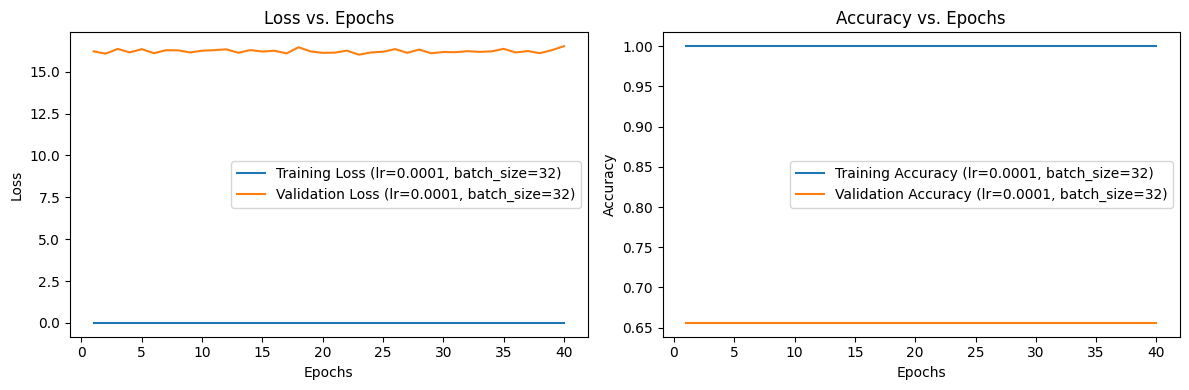

Epoch 1/40, Training Loss: 0.0000, Training Accuracy: 1.0000, Validation Loss: 16.1968, Validation Accuracy: 0.6560
Epoch 2/40, Training Loss: 0.0000, Training Accuracy: 1.0000, Validation Loss: 16.2370, Validation Accuracy: 0.6560
Epoch 3/40, Training Loss: 0.0000, Training Accuracy: 1.0000, Validation Loss: 16.1564, Validation Accuracy: 0.6560
Epoch 4/40, Training Loss: 0.0000, Training Accuracy: 1.0000, Validation Loss: 16.1864, Validation Accuracy: 0.6560
Epoch 5/40, Training Loss: 0.0000, Training Accuracy: 1.0000, Validation Loss: 16.2591, Validation Accuracy: 0.6560
Epoch 6/40, Training Loss: 0.0000, Training Accuracy: 1.0000, Validation Loss: 16.2359, Validation Accuracy: 0.6560
Epoch 7/40, Training Loss: 0.0000, Training Accuracy: 1.0000, Validation Loss: 16.2363, Validation Accuracy: 0.6560
Epoch 8/40, Training Loss: 0.0000, Training Accuracy: 1.0000, Validation Loss: 16.2596, Validation Accuracy: 0.6560
Epoch 9/40, Training Loss: 0.0000, Training Accuracy: 1.0000, Validation

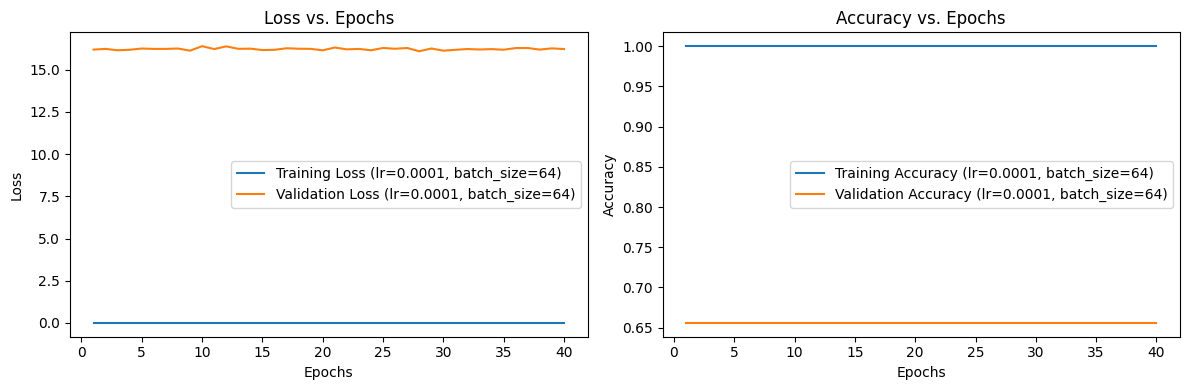

Epoch 1/40, Training Loss: 0.0000, Training Accuracy: 1.0000, Validation Loss: 16.2224, Validation Accuracy: 0.6560
Epoch 2/40, Training Loss: 0.0000, Training Accuracy: 1.0000, Validation Loss: 16.2224, Validation Accuracy: 0.6560
Epoch 3/40, Training Loss: 0.0000, Training Accuracy: 1.0000, Validation Loss: 16.2224, Validation Accuracy: 0.6560
Epoch 4/40, Training Loss: 0.0000, Training Accuracy: 1.0000, Validation Loss: 16.2224, Validation Accuracy: 0.6560
Epoch 5/40, Training Loss: 0.0000, Training Accuracy: 1.0000, Validation Loss: 16.2224, Validation Accuracy: 0.6560
Epoch 6/40, Training Loss: 0.0000, Training Accuracy: 1.0000, Validation Loss: 16.2224, Validation Accuracy: 0.6560
Epoch 7/40, Training Loss: 0.0000, Training Accuracy: 1.0000, Validation Loss: 16.2224, Validation Accuracy: 0.6560
Epoch 8/40, Training Loss: 0.0000, Training Accuracy: 1.0000, Validation Loss: 16.2224, Validation Accuracy: 0.6560
Epoch 9/40, Training Loss: 0.0000, Training Accuracy: 1.0000, Validation

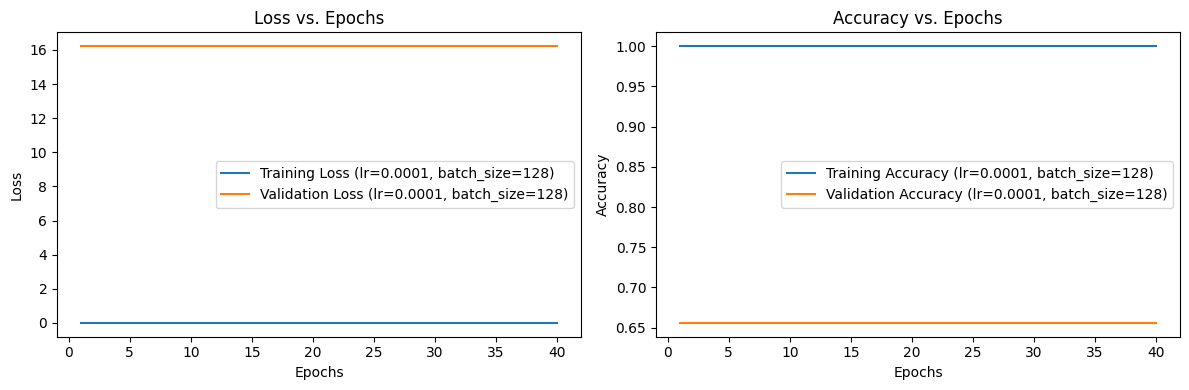

Epoch 1/40, Training Loss: 0.0000, Training Accuracy: 1.0000, Validation Loss: 16.1360, Validation Accuracy: 0.6560
Epoch 2/40, Training Loss: 0.0000, Training Accuracy: 1.0000, Validation Loss: 16.1368, Validation Accuracy: 0.6560
Epoch 3/40, Training Loss: 0.0000, Training Accuracy: 1.0000, Validation Loss: 16.2413, Validation Accuracy: 0.6560
Epoch 4/40, Training Loss: 0.0000, Training Accuracy: 1.0000, Validation Loss: 16.3437, Validation Accuracy: 0.6560
Epoch 5/40, Training Loss: 0.0000, Training Accuracy: 1.0000, Validation Loss: 16.2327, Validation Accuracy: 0.6560
Epoch 6/40, Training Loss: 0.0000, Training Accuracy: 1.0000, Validation Loss: 16.2573, Validation Accuracy: 0.6560
Epoch 7/40, Training Loss: 0.0000, Training Accuracy: 1.0000, Validation Loss: 16.2090, Validation Accuracy: 0.6560
Epoch 8/40, Training Loss: 0.0000, Training Accuracy: 1.0000, Validation Loss: 16.1648, Validation Accuracy: 0.6560
Epoch 9/40, Training Loss: 0.0000, Training Accuracy: 1.0000, Validation

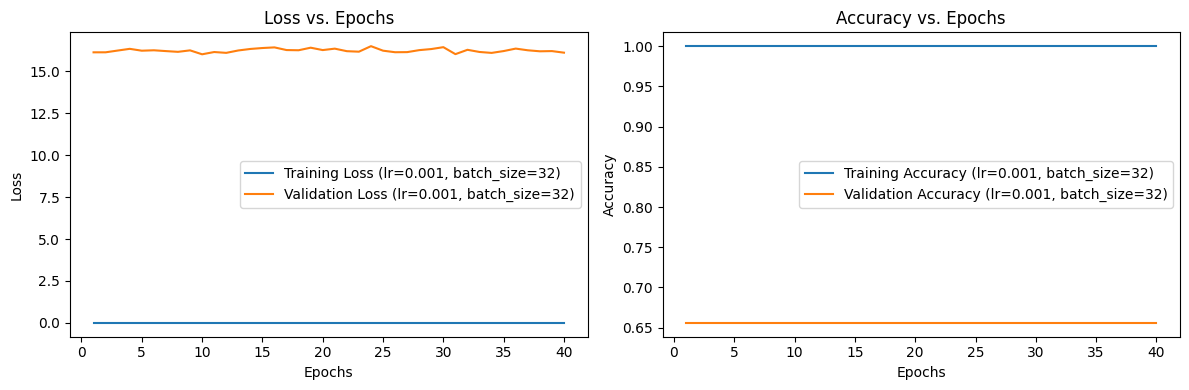

Epoch 1/40, Training Loss: 0.0000, Training Accuracy: 1.0000, Validation Loss: 16.2734, Validation Accuracy: 0.6560
Epoch 2/40, Training Loss: 0.0000, Training Accuracy: 1.0000, Validation Loss: 16.2214, Validation Accuracy: 0.6560
Epoch 3/40, Training Loss: 0.0000, Training Accuracy: 1.0000, Validation Loss: 16.0714, Validation Accuracy: 0.6560
Epoch 4/40, Training Loss: 0.0000, Training Accuracy: 1.0000, Validation Loss: 16.1984, Validation Accuracy: 0.6560
Epoch 5/40, Training Loss: 0.0000, Training Accuracy: 1.0000, Validation Loss: 16.2094, Validation Accuracy: 0.6560
Epoch 6/40, Training Loss: 0.0000, Training Accuracy: 1.0000, Validation Loss: 16.2137, Validation Accuracy: 0.6560
Epoch 7/40, Training Loss: 0.0000, Training Accuracy: 1.0000, Validation Loss: 16.3268, Validation Accuracy: 0.6560
Epoch 8/40, Training Loss: 0.0000, Training Accuracy: 1.0000, Validation Loss: 16.1737, Validation Accuracy: 0.6560
Epoch 9/40, Training Loss: 0.0000, Training Accuracy: 1.0000, Validation

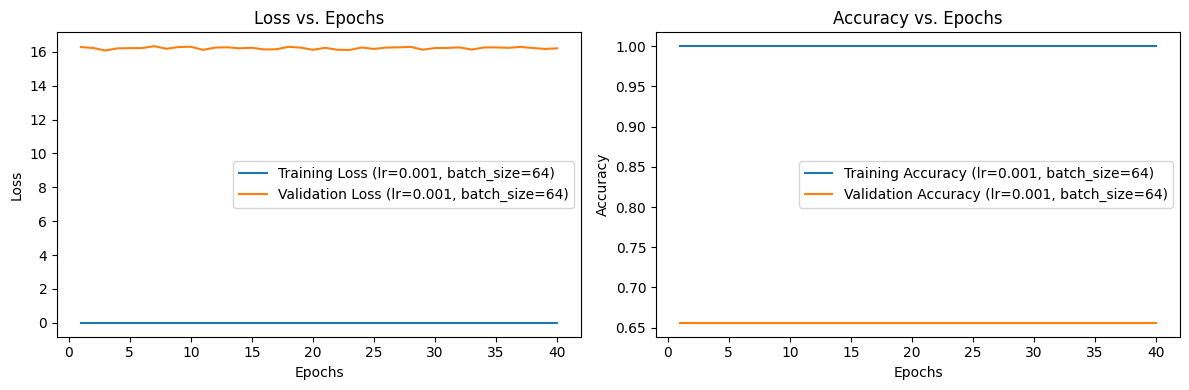

Epoch 1/40, Training Loss: 0.0000, Training Accuracy: 1.0000, Validation Loss: 16.2229, Validation Accuracy: 0.6560
Epoch 2/40, Training Loss: 0.0000, Training Accuracy: 1.0000, Validation Loss: 16.2229, Validation Accuracy: 0.6560
Epoch 3/40, Training Loss: 0.0000, Training Accuracy: 1.0000, Validation Loss: 16.2229, Validation Accuracy: 0.6560
Epoch 4/40, Training Loss: 0.0000, Training Accuracy: 1.0000, Validation Loss: 16.2229, Validation Accuracy: 0.6560
Epoch 5/40, Training Loss: 0.0000, Training Accuracy: 1.0000, Validation Loss: 16.2229, Validation Accuracy: 0.6560
Epoch 6/40, Training Loss: 0.0000, Training Accuracy: 1.0000, Validation Loss: 16.2229, Validation Accuracy: 0.6560
Epoch 7/40, Training Loss: 0.0000, Training Accuracy: 1.0000, Validation Loss: 16.2229, Validation Accuracy: 0.6560
Epoch 8/40, Training Loss: 0.0000, Training Accuracy: 1.0000, Validation Loss: 16.2229, Validation Accuracy: 0.6560
Epoch 9/40, Training Loss: 0.0000, Training Accuracy: 1.0000, Validation

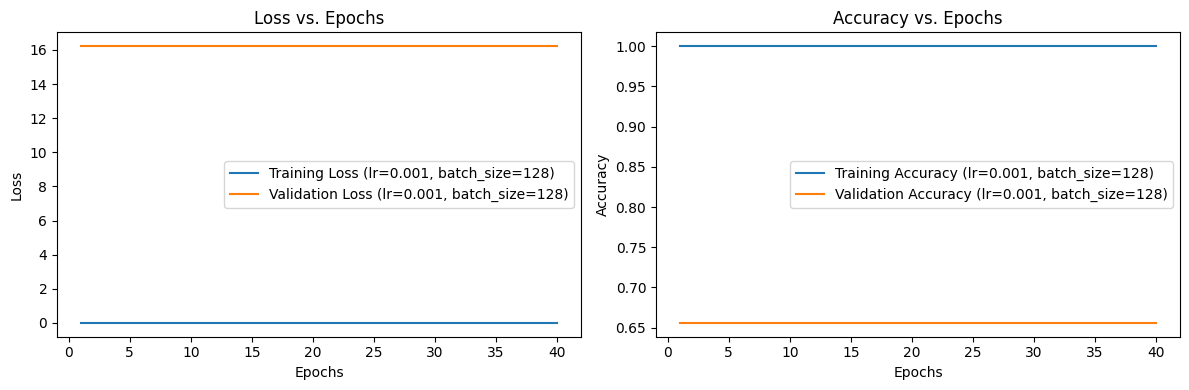

Epoch 1/40, Training Loss: 0.0000, Training Accuracy: 1.0000, Validation Loss: 16.2031, Validation Accuracy: 0.6560
Epoch 2/40, Training Loss: 0.0000, Training Accuracy: 1.0000, Validation Loss: 16.0603, Validation Accuracy: 0.6560
Epoch 3/40, Training Loss: 0.0000, Training Accuracy: 1.0000, Validation Loss: 16.0673, Validation Accuracy: 0.6560
Epoch 4/40, Training Loss: 0.0000, Training Accuracy: 1.0000, Validation Loss: 16.2148, Validation Accuracy: 0.6560
Epoch 5/40, Training Loss: 0.0000, Training Accuracy: 1.0000, Validation Loss: 16.1777, Validation Accuracy: 0.6560
Epoch 6/40, Training Loss: 0.0000, Training Accuracy: 1.0000, Validation Loss: 16.1309, Validation Accuracy: 0.6560
Epoch 7/40, Training Loss: 0.0000, Training Accuracy: 1.0000, Validation Loss: 16.1661, Validation Accuracy: 0.6560
Epoch 8/40, Training Loss: 0.0000, Training Accuracy: 1.0000, Validation Loss: 16.2042, Validation Accuracy: 0.6560
Epoch 9/40, Training Loss: 0.0000, Training Accuracy: 1.0000, Validation

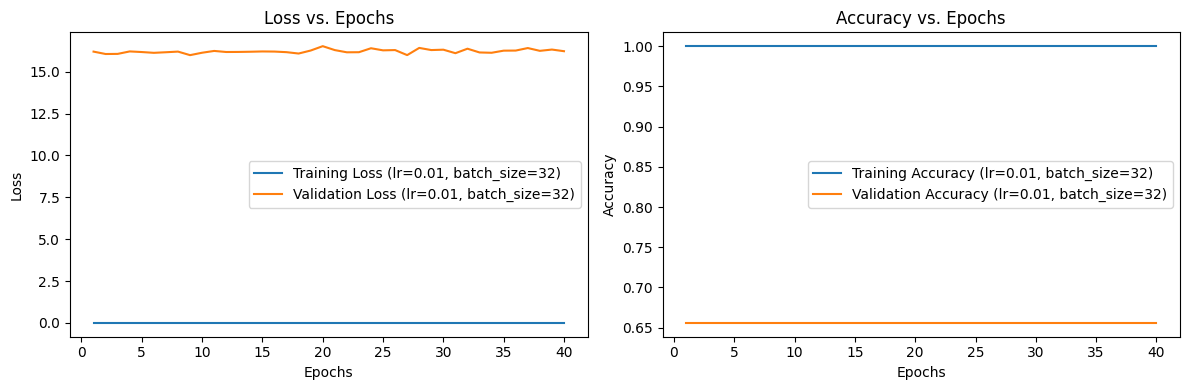

Epoch 1/40, Training Loss: 0.0000, Training Accuracy: 1.0000, Validation Loss: 16.1478, Validation Accuracy: 0.6560
Epoch 2/40, Training Loss: 0.0000, Training Accuracy: 1.0000, Validation Loss: 16.1457, Validation Accuracy: 0.6560
Epoch 3/40, Training Loss: 0.0000, Training Accuracy: 1.0000, Validation Loss: 16.2198, Validation Accuracy: 0.6560
Epoch 4/40, Training Loss: 0.0000, Training Accuracy: 1.0000, Validation Loss: 16.2488, Validation Accuracy: 0.6560
Epoch 5/40, Training Loss: 0.0000, Training Accuracy: 1.0000, Validation Loss: 16.3011, Validation Accuracy: 0.6560
Epoch 6/40, Training Loss: 0.0000, Training Accuracy: 1.0000, Validation Loss: 16.2775, Validation Accuracy: 0.6560
Epoch 7/40, Training Loss: 0.0000, Training Accuracy: 1.0000, Validation Loss: 16.3845, Validation Accuracy: 0.6560
Epoch 8/40, Training Loss: 0.0000, Training Accuracy: 1.0000, Validation Loss: 16.3069, Validation Accuracy: 0.6560
Epoch 9/40, Training Loss: 0.0000, Training Accuracy: 1.0000, Validation

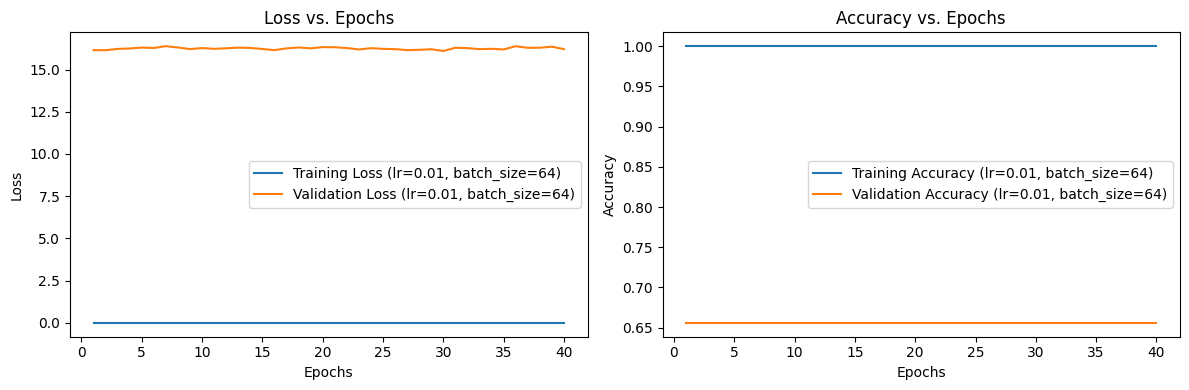

Epoch 1/40, Training Loss: 0.0000, Training Accuracy: 1.0000, Validation Loss: 16.2278, Validation Accuracy: 0.6560
Epoch 2/40, Training Loss: 0.0000, Training Accuracy: 1.0000, Validation Loss: 16.2278, Validation Accuracy: 0.6560
Epoch 3/40, Training Loss: 0.0000, Training Accuracy: 1.0000, Validation Loss: 16.2279, Validation Accuracy: 0.6560
Epoch 4/40, Training Loss: 0.0000, Training Accuracy: 1.0000, Validation Loss: 16.2279, Validation Accuracy: 0.6560
Epoch 5/40, Training Loss: 0.0000, Training Accuracy: 1.0000, Validation Loss: 16.2279, Validation Accuracy: 0.6560
Epoch 6/40, Training Loss: 0.0000, Training Accuracy: 1.0000, Validation Loss: 16.2279, Validation Accuracy: 0.6560
Epoch 7/40, Training Loss: 0.0000, Training Accuracy: 1.0000, Validation Loss: 16.2279, Validation Accuracy: 0.6560
Epoch 8/40, Training Loss: 0.0000, Training Accuracy: 1.0000, Validation Loss: 16.2280, Validation Accuracy: 0.6560
Epoch 9/40, Training Loss: 0.0000, Training Accuracy: 1.0000, Validation

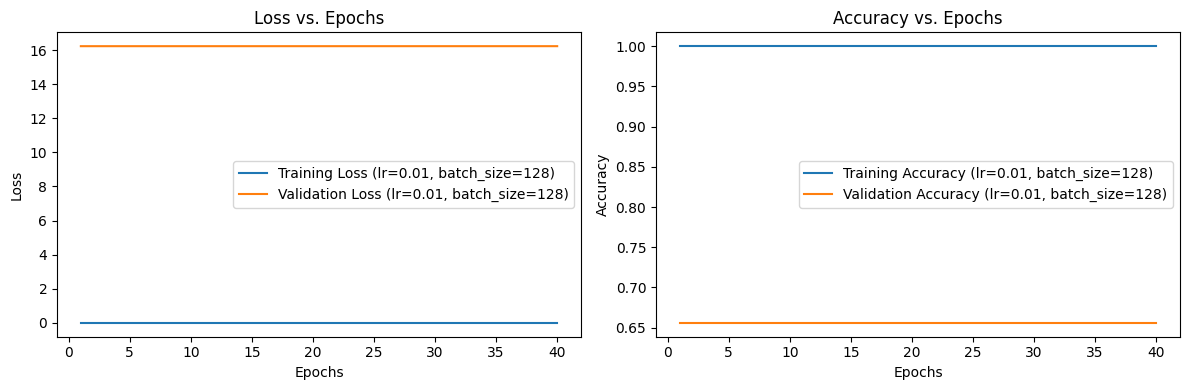

Test Accuracy: 0.6800


In [119]:
for lr in learning_rates:
    for batch_size in batch_sizes:
        criterion = nn.CrossEntropyLoss()
        optimizer = optim.Adam(model.parameters(), lr=lr)

        train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
        valid_loader = DataLoader(valid_dataset, batch_size=batch_size, shuffle=True)
        test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

        # Training loop
        train_losses = []
        valid_losses = []
        train_accuracy = []
        valid_accuracy = []

        for epoch in range(epochs):
            model.train()

            running_loss = 0.0
            correct_train = 0
            total_train = 0

            for inputs, labels in train_loader:
                optimizer.zero_grad()
                outputs = model(inputs)
                loss = criterion(outputs, labels)
                loss.backward()
                optimizer.step()

                running_loss += loss.item()

                _, predicted = torch.max(outputs, 1)
                total_train += labels.size(0)
                correct_train += (predicted == labels).sum().item()

            train_losses.append(running_loss / len(train_loader))
            train_accuracy.append(correct_train / total_train)

            # Validation
            model.eval()

            running_loss = 0.0
            correct_valid = 0
            total_valid = 0

            with torch.no_grad():
                for inputs, labels in valid_loader:
                    outputs = model(inputs)
                    loss = criterion(outputs, labels)
                    running_loss += loss.item()

                    _, predicted = torch.max(outputs, 1)
                    total_valid += labels.size(0)
                    correct_valid += (predicted == labels).sum().item()

                valid_losses.append(running_loss / len(valid_loader))
                valid_accuracy.append(correct_valid / total_valid)

                print(f'Epoch {epoch + 1}/{epochs}, '
                      f'Training Loss: {train_losses[-1]:.4f}, Training Accuracy: {train_accuracy[-1]:.4f}, '
                      f'Validation Loss: {valid_losses[-1]:.4f}, Validation Accuracy: {valid_accuracy[-1]:.4f}')
                models.append(model)

        # Visualization
        plt.figure(figsize=(12, 4))

        plt.subplot(1, 2, 1)
        plt.plot(range(1, epochs + 1), train_losses, label=f'Training Loss (lr={lr}, batch_size={batch_size})')
        plt.plot(range(1, epochs + 1), valid_losses, label=f'Validation Loss (lr={lr}, batch_size={batch_size})')
        plt.legend()
        plt.xlabel('Epochs')
        plt.ylabel('Loss')
        plt.title('Loss vs. Epochs')

        plt.subplot(1, 2, 2)
        plt.plot(range(1, epochs + 1), train_accuracy, label=f'Training Accuracy (lr={lr}, batch_size={batch_size})')
        plt.plot(range(1, epochs + 1), valid_accuracy, label=f'Validation Accuracy (lr={lr}, batch_size={batch_size})')
        plt.legend()
        plt.xlabel('Epochs')
        plt.ylabel('Accuracy')
        plt.title('Accuracy vs. Epochs')

        plt.tight_layout()
        plt.show()

# Evaluate model on the test set
model.eval()
test_correct = 0
test_total = 0

with torch.no_grad():
    for inputs, labels in test_loader:
        outputs = model(inputs)
        _, predicted = torch.max(outputs, 1)
        test_total += labels.size(0)
        test_correct += (predicted == labels).sum().item()

test_accuracy = test_correct / test_total
print(f'Test Accuracy: {test_accuracy:.4f}')


In [115]:
torch.save({
    'epoch': epoch,
    'model_state_dict': model.state_dict(),
    'optimizer_state_dict': optimizer.state_dict(),
}, 'model.pth')

In [152]:
sample = "единственный банк который показывать мобильный приложение сумма дата платеж сохранение беспроцентный период отражаться платеж "" -  лишь минимальный платеж который обеспечивать сохранение беспроцентный период необходимо очень тщательно отслеживать платеж самостоятельно опираться собственный расчет банк предупреждать подсказывать обязательно радость начислять штрафной процент вылет грейс поддержка также нелегко получать необходимый информация прямой вопрос отвечать пространный следовать рекомендация штрафной процент вылет грейс обеспечивать"
max_words = 1000
cv = CountVectorizer(max_features=max_words, stop_words=stopwords.words('russian'))
sparse_matrix = cv.fit_transform(np.array([sample])).toarray()
if sparse_matrix.shape[1] < 1000:
    sparse_matrix = np.pad(sparse_matrix, ((0, 0), (0, 1000 - sparse_matrix.shape[1])))
sparse_matrix.shape

(1, 1000)

In [153]:
review = Variable(torch.from_numpy(sparse_matrix)).float()
model = LogisticRegression()
loaded_checkpoint = torch.load('model.pth')
model.load_state_dict(loaded_checkpoint['model_state_dict'])
optimizer.load_state_dict(loaded_checkpoint['optimizer_state_dict'])
epoch = loaded_checkpoint['epoch']

model.eval()

LogisticRegression(
  (linear1): Linear(in_features=1000, out_features=100, bias=True)
  (linear2): Linear(in_features=100, out_features=10, bias=True)
  (linear3): Linear(in_features=10, out_features=2, bias=True)
)

In [154]:
with torch.no_grad():
    output = model(review)
    print('output: ', output)


predicted_class = torch.argmax(output).item()

print(f"Предсказанный класс отзыва: {predicted_class}")

output:  tensor([[-2.6580, -1.0158]])
Предсказанный класс отзыва: 1
